## Start
<a id='top'>Top reference</a>

In [204]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer,StandardScaler,LabelBinarizer,OneHotEncoder
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
sns.set()
pd.options.display.max_columns = 50
pd.options.plotting.backend = "plotly"

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
}
sorted(dtype_info)

data = pd.read_pickle("../data/train.pkl")
prediction_data = pd.read_pickle('../data/pred_data.pkl')

discrete = data.select_dtypes(include="int64")
numeric = data.select_dtypes(include="float64")

ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]

def categorise_data(data):
    ordinal_data = data.loc[:,ordinal]
    nominal_data = data.loc[:,nominal]
    binary_data = data.loc[:,binary]
    return ordinal_data, nominal_data, binary_data
# ordinal_data, nominal_data, binary_data = categorise_data(data)
# ordinal_data.to_pickle('../data/ordinal_data.pkl')
# nominal_data.to_pickle('../data/nominal_data.pkl')
# binary_data.to_pickle('../data/binary_data.pkl')
ordinal_data_test, nominal_data_test, binary_data_test = categorise_data(prediction_data)
ordinal_data = pd.read_pickle('../data/ordinal_data.pkl')
nominal_data = pd.read_pickle('../data/nominal_data.pkl')
binary_data = pd.read_pickle('../data/binary_data.pkl')

#### Libraries Permitted
    Scikit-learn
    XGBoost
    NumPy
    Pandas
    SciPy
    Pickle
    Seaborn
    Matplotlib

#### Type of Columns

    'v_1': 'Binary',
    'v_26': 'Binary',
    'v_11': 'Binary',
    'v_14': 'Binary',
    'v_30': 'Binary',
    'v_28': 'Binary', 
    'v_9': 'Binary', 
    'v_27': 'Binary',
    'v_32': 'Nominal', 
    'v_4': 'Nominal',
    'v_3': 'Nominal',
    'v_20': 'Nominal',
    'v_21': 'Nominal',
    'v_18': 'Nominal',
    'v_25': 'Nominal',
    'v_12': 'Nominal', 
    'v_31': 'Ordinal',
    'v_15': 'Ordinal',
    'v_19': 'Ordinal',
    'v_13': 'Ordinal',
    'v_33': 'Ordinal',
    'v_17': 'Ordinal',
    'v_29': 'Ordinal',
    'v_23': 'Ordinal',
    'v_6': 'Ordinal', 
    'v_24': 'Ordinal', 
    'v_10': 'Ordinal', 
    'v_5': 'Ordinal',
    'v_22': 'Ordinal',
    'v_0': 'Ordinal',
    'v_16': 'Ratio',
    'v_2': 'Ratio',
    'v_8': 'Ratio',
    'v_7': 'Ratio'


#### Discrete Columns
['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25', 'v_20', 'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9', 'v_31', 'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_23', 'v_24', 'v_10', 'v_5', 'v_6', 'v_0', 'v_34', 'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40', 'label']

In [ ]:
%matplotlib inline

#### Histograms of Ordinal Data
![Image](../imgs/hist_ordinal.png)

#### Histograms of Nominal Data
![Image](../imgs/hist_nominal.png)

#### Histograms of Binary Data
![Image](../imgs/hist_binary.png)

In [ ]:
# data.to_pickle('../data/train.pkl')
# # data = pd.read_csv('../data/train.csv', index_col=0)

In [ ]:
def separate_floating_value(ordinal_data):
    ordinal_data['decimal_values_29'] = 0
    ordinal_data['decimal_values_22'] = 0
    ordinal_data.decimal_values_22 = ordinal_data.v_22 - ordinal_data.v_22.round()
    ordinal_data.decimal_values_29 = ordinal_data.v_29 - ordinal_data.v_29.round()
    ordinal_data.v_29 = ordinal_data['v_29'].round()
    ordinal_data.v_22 = ordinal_data['v_22'].round()
    return ordinal_data

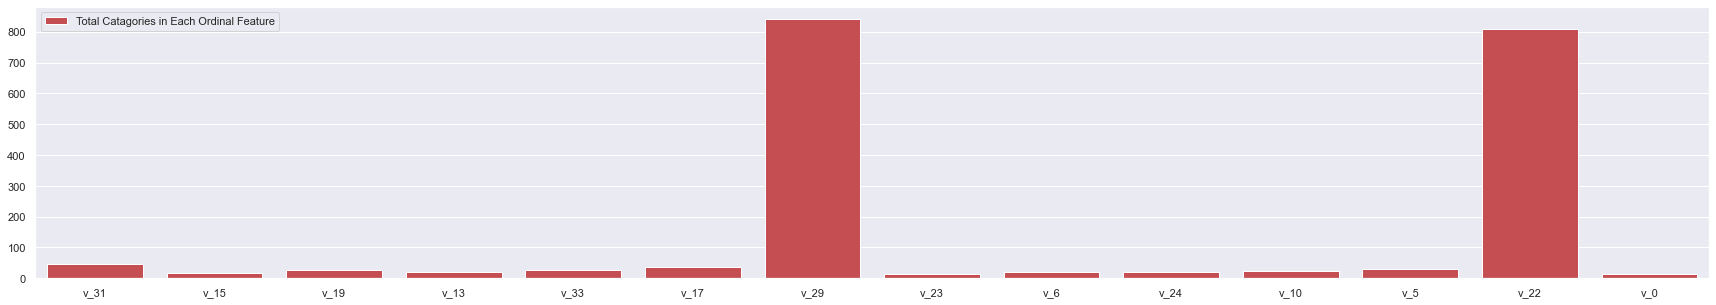

In [ ]:
categorical = ordinal+nominal
oridinal_categories_total= {}
for c in ordinal:
    # print(c, len(data[c].unique()))
    oridinal_categories_total[c]=len(data[c].unique())
fig = plt.figure(figsize=(30,5))
    
fig = sns.barplot(x=ordinal,saturation=1, y=list(oridinal_categories_total.values()), label='Total Catagories in Each Ordinal Feature',color='r')
plt.legend()
# plt.table(ordinal)
plt.shor()

##### After Removing the decimal Part from the features

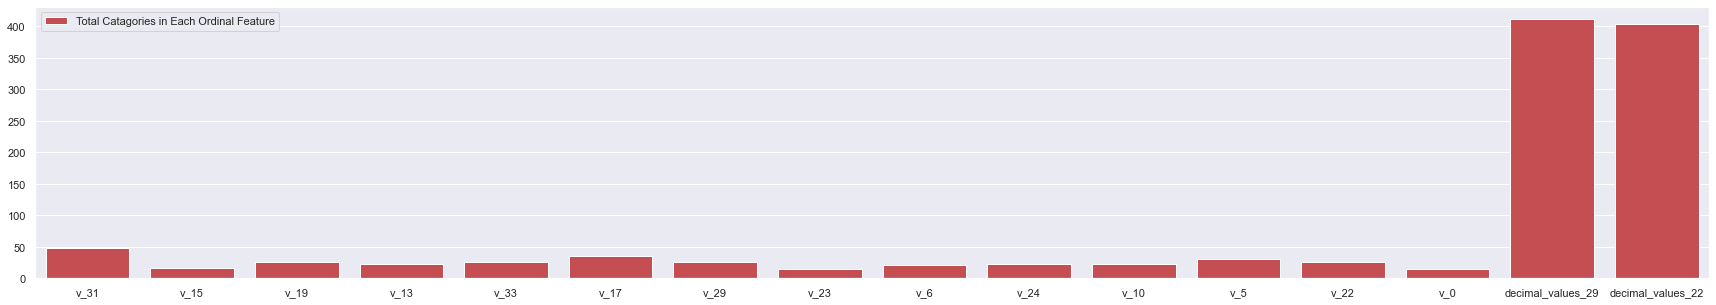

In [ ]:
categorical = ordinal+nominal
oridinal_categories_total= {}
for c in ordinal_data.columns:
    # print(c, len(data[c].unique()))
    oridinal_categories_total[c]=len(ordinal_data[c].unique())
fig = plt.figure(figsize=(30,5))
    
fig = sns.barplot(x=ordinal_data.columns,saturation=1, y=list(oridinal_categories_total.values()), label='Total Catagories in Each Ordinal Feature',color='r')
# plt.table(ordinal)
# fig = plt.title
plt.xlabel = "After CLeanup"
fig = plt.legend()
fig = plt.show()

In [ ]:
# pd
temp = pd.DataFrame(oridinal_categories_total,columns=oridinal_categories_total.keys(),index=['count'])
temp.style

,v_31,v_15,v_19,v_13,v_33,v_17,v_29,v_23,v_6,v_24,v_10,v_5,v_22,v_0,decimal_values_29,decimal_values_22
count,48,17,26,22,26,36,26,14,21,22,23,30,26,15,411,403


In [ ]:
for c in ordinal_data.columns:
    if 'decimal' not in c:
        ordinal_data[c] = ordinal_data[c].astype(np.uint8)

In [ ]:
# def print_num_cat(dd):
    for c in dd.columns:
        print(c,"\t|\t", len(dd[c].unique()))
        print("-"*30)

print("Binary")
print_num_cat(binary_data)
# print("-"*30)
print("\n"*4)

print("Nominal")
print_num_cat(nominal_data)
print("\n"*4)
print("Ordinal")
print_num_cat(ordinal_data)

In [ ]:
ordinal_data.decimal_values_22[ordinal_data.decimal_values_22! = 0].shape

(2496,)

In [ ]:
fig = plt.figure(figsize=(30,10))

hm = sns.heatmap(data.corr())

In [ ]:
corr_mat = data.corr()

In [ ]:
training_target = data.label
df = data.drop(['label'],axis=1)
# len(df.columns)
corr_mat

In [ ]:
# others = [c for c in data.columns if '__' not in c]
def rename_with_type_label(data):
    global ordinal,nominal,binary
    rn_mp_ord = {c: f'ord__{c}' for c in ordinal}
    rn_mp_nom = {c: f'nom__{c}' for c in nominal}
    rn_mp_bin = {c: f'bin__{c}' for c in binary}
    # rn_mp_num = {c: f'bin__{c}' for c in binary}
    rn_mp_bin.update(rn_mp_nom)
    rn_mp_ord.update(rn_mp_bin)
    sorted(rn_mp_ord)

    data = data.rename(rn_mp_ord,axis=1)
    return data
data = rename_with_type_label(data)

In [ ]:
others = [c for c in data.columns if '__' not in c]

other_data = data.loc[:,others]

data.columns
from collections import defaultdict


def gen_adj_list(threshold, data=data):
    adj_list = defaultdict(list)
    corr_mat = data.corr()
    for c in data.columns:
        # adj_list[c].append()
        e = list(corr_mat[corr_mat[c]>=threshold][c].index)
        e.remove(c)
        adj_list[c]=e
        # print(e)
        # break
    return adj_list

#### Correlation graph of features with correl > 0.5 at default scales
<img src="../imgs/correl_0.5.png" alt="Drawing" style="width: 1900px;height: 500px;"/>

In [ ]:
def Hamming_distance(a, b):
    "Funtion to calculate hamming distance between array a and b"
    ham = 0
    for i in range(a.shape[0]):
        if a[i] != b[i]:
            ham += 1
    return ham

for c in ndc.columns:
    print(ndc[c].value_counts().sort_values())
    print("="*80)

for c in ndc.columns:
    print(ndc[c].value_counts().sort_values())
    print("="*80)

In [ ]:
prediction_data.describe()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,v_3,v_11,v_14,v_26,v_27,v_30,v_9,v_31,v_28,v_13,v_33,v_17,v_19,v_29,v_23,v_24,v_10,v_5,v_6,v_22,v_0,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.00000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,4.893735,71.097666,11.465602,102.058968,1.677518,3.299754,19.086609,96.767199,171.600737,61.606265,68.415233,1.325553,0.842138,0.930590,1.649877,1.133292,1.027027,31.863636,0.79914,15.437346,30.039312,50.048526,23.399877,17.459929,3.909091,16.307125,26.020885,39.939189,13.204545,23.984329,12.900491,12.409091,1.997482,0.834472,5.259828,49.468673,25.963145,20.894349,30.241400,40.323096,3.245086
std,6.354640,56.517483,2.408124,44.984573,2.130889,4.469780,15.406055,78.752500,103.368968,53.562517,49.187194,2.133737,2.182575,2.158609,2.088754,2.121983,2.112219,7.538295,2.06551,3.119285,3.250973,4.651411,3.627787,5.314244,2.248068,2.810381,3.002487,4.606119,3.681453,5.697578,2.159281,3.416760,2.475053,3.145214,3.611350,29.481917,14.984396,11.663796,17.931066,22.777727,2.684748
min,3.000000,6.000000,10.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.00000,14.000000,23.000000,41.000000,18.000000,6.000000,3.000000,15.000000,19.000000,31.000000,8.000000,13.000000,12.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.000000,10.000000,59.000000,1.000000,1.000000,16.000000,5.000000,60.000000,23.000000,39.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,27.000000,0.00000,14.000000,29.000000,48.000000,21.000000,17.000000,3.000000,15.000000,25.000000,37.000000,11.000000,24.000000,12.000000,9.400000,0.450000,-1.700000,2.000000,23.750000,13.000000,11.000000,15.000000,21.000000,1.000000
50%,3.000000,89.000000,10.000000,102.000000,1.000000,1.000000,16.000000,110.000000,175.000000,37.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,29.000000,0.00000,14.000000,29.000000,49.000000,24.000000,18.500000,3.000000,15.000000,25.000000,39.000000,13.000000,25.500000,12.000000,12.400000,1.400000,0.790000,5.000000,49.000000,26.000000,21.000000,30.000000,40.000000,3.000000
75%,4.000000,116.000000,12.000000,148.000000,1.000000,3.000000,16.000000,181.000000,251.000000,103.000000,87.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,34.000000,0.00000,15.000000,30.000000,52.000000,25.000000,19.857143,3.000000,15.000000,27.000000,42.000000,15.000000,27.000000,12.000000,15.500000,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,46.000000,60.000000,5.000000
max,65.000000,176.000000,22.000000,176.000000,10.000000,24.000000,172.000000,274.000000,324.000000,318.000000,441.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,68.000000,10.00000,36.000000,49.000000,86.000000,44.000000,30.857143,17.000000,33.000000,42.000000,63.000000,30.000000,38.692308,26.000000,25.200000,12.700000,12.510000,18.000000,108.000000,58.000000,49.000000,69.000000,87.000000,14.000000


In [ ]:
data.describe()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,v_3,v_11,v_14,v_26,v_27,v_30,v_9,v_31,v_28,v_13,v_33,v_17,v_19,v_29,v_23,v_24,v_10,v_5,v_6,v_22,v_0,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000
mean,4.817439,70.825606,11.609062,99.329294,1.737882,3.436249,18.970495,97.203372,166.138567,57.441254,65.922023,1.431243,0.83588,0.973130,1.755532,1.227081,1.089831,32.134089,0.845100,15.600896,30.127239,50.165701,23.562171,17.506418,3.975764,16.392255,26.064015,39.934932,13.281876,24.121478,12.998156,12.394810,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978,0.85432
std,6.166860,56.110329,2.576362,45.017380,2.163671,4.577644,15.010042,79.213308,103.121322,50.416264,43.698147,2.281682,2.10919,2.187716,2.221415,2.242849,2.209357,7.887596,2.132188,3.216409,3.256676,4.670733,3.757691,5.346593,2.249038,2.866872,3.079682,4.507494,3.674661,5.677114,2.309686,3.414303,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851,0.69866
min,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,3.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,14.000000,23.000000,41.000000,18.000000,6.000000,3.000000,15.000000,19.000000,31.000000,8.000000,13.000000,12.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,23.000000,39.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,27.000000,0.000000,14.000000,29.000000,48.000000,22.000000,17.200000,3.000000,15.000000,25.000000,37.000000,11.000000,24.000000,12.000000,9.400000,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000,0.00000
50%,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,30.000000,70.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,29.000000,0.000000,14.000000,29.000000,49.000000,24.000000,18.571429,3.000000,15.000000,25.000000,39.000000,13.000000,25.500000,12.000000,12.400000,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000,1.00000
75%,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,103.000000,87.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,16.000000,31.000000,53.000000,25.000000,20.000000,3.000000,16.000000,27.000000,42.000000,15.000000,27.000000,12.000000,14.900000,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000,1.00000
max,61.000000,176.000000,25.000000,176.000000,10.000000,25.000000,179.000000,289.000000,322.000000,324.000000,428.000000,10.000000,9.00000,10.000000,10.000000,10.000000,10.000000,78.000000,10.000000,38.000000,49.000000,86.000000,45.000000,31.111111,17.000000,37.000000,42.000000,64.000000,28.000000,38.000000,26.000000,25.200000,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000,2.00000


In [ ]:
def int_compress(df):
    int64_data = df.select_dtypes(include='int64')
    i64_cols = list(int64_data.columns)
    df.loc[:,i64_cols] = df.loc[:,i64_cols].astype(np.int16)
    return df
data = int_compress(data)
prediction_data = int_compress(prediction_data)

In [ ]:
# prediction_data.info()
cat_diff = {}
cate = list(data.select_dtypes(include='int16').columns)
for c in cate:
    if c =='label':
        continue
    train_dat_cat = data[c].unique()
    test_dat_cat = prediction_data[c].unique()
    n_cat_train = data[c].value_counts()
    s = 0
    # for cst in np.setdiff1d(test_dat_cat,train_dat_cat):
        # s+= n_cat_train[cst]
    cat_diff[c] = (np.setdiff1d(test_dat_cat,train_dat_cat).shape[0],train_dat_cat.shape[0]-test_dat_cat.shape[0])
    

star = (0,0)
rats = ordinal + nominal + binary
for n in cat_diff:
    # if n not in rats:
    try:
        x,  z = cat_diff[n]
        a,c = star
        star = a+x, c+z
    except:
        continue

In [ ]:
star

(73, 128)

nominal = (165, 335, 100)<br>
ordinal = (28, 51, 22)<br>
unk = (8,26,7)


### Inherently multiclass:

    naive_bayes.BernoulliNB

    tree.DecisionTreeClassifier

    tree.ExtraTreeClassifier

    ensemble.ExtraTreesClassifier

    naive_bayes.GaussianNB

    neighbors.KNeighborsClassifier

    semi_supervised.LabelPropagation

    semi_supervised.LabelSpreading

    discriminant_analysis.LinearDiscriminantAnalysis

    svm.LinearSVC (setting multi_class=”crammer_singer”)

    linear_model.LogisticRegression (setting multi_class=”multinomial”)

    linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)

    neural_network.MLPClassifier

    neighbors.NearestCentroid

    discriminant_analysis.QuadraticDiscriminantAnalysis

    neighbors.RadiusNeighborsClassifier

    ensemble.RandomForestClassifier

    linear_model.RidgeClassifier

    linear_model.RidgeClassifierCV

### Multiclass as One-Vs-One:

    svm.NuSVC

    svm.SVC.

    gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_one”)

### Multiclass as One-Vs-The-Rest:

    ensemble.GradientBoostingClassifier

    gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_rest”)

    svm.LinearSVC (setting multi_class=”ovr”)

    linear_model.LogisticRegression (setting multi_class=”ovr”)

    linear_model.LogisticRegressionCV (setting multi_class=”ovr”)

    linear_model.SGDClassifier

    linear_model.Perceptron

    linear_model.PassiveAggressiveClassifier



In [ ]:
ffd_bin = {}
def ff_dist_c(i, j):
    global data, prediction_data
    fvf_dist_1 = prediction_data.groupby(i)[j].value_counts().unstack().fillna(0).to_numpy()
    fvf_dist_2 = data.groupby(i)[j].value_counts().unstack().fillna(0).to_numpy()
    if fvf_dist_1.shape[1] != fvf_dist_2.shape[1]:
        dumb_c = np.zeros(11)
        fvf_dist_2 = np.c_[fvf_dist_2, dumb_c]
    if fvf_dist_1.shape[0] != fvf_dist_2.shape[0]:
        dumb_c = np.zeros(11).reshape(1,11)
        fvf_dist_2 = np.r_[fvf_dist_2, dumb_c]
    return fvf_dist_1 + fvf_dist_2
for c in binary:
    master_fvf_dist = None
    for cc in binary:
        if c!=cc:
            tm = ff_dist_c(c,cc)
            if type(master_fvf_dist) == np.ndarray:
                master_fvf_dist = master_fvf_dist + tm
            else:
                master_fvf_dist = tm
    ffd_bin[c] = master_fvf_dist

In [ ]:
np.printoptions(suppress=False)
# print(list(ffd_bin['v_11']))
for r in list(ffd_bin['v_11']):
    print(r)

[9077. 4957.   30.   27.   29.   30.   23.   24.   30.   15.   10.]
[10806.  6297.    77.    63.    70.    65.    66.    63.    74.    73.
    28.]
[46. 55. 78. 85. 77. 65. 83. 73. 63. 73. 30.]
[49. 54. 59. 69. 83. 64. 59. 70. 73. 71. 28.]
[48. 68. 56. 61. 73. 74. 85. 81. 69. 56. 22.]
[33. 64. 57. 70. 74. 65. 72. 50. 65. 61. 19.]
[44. 67. 61. 55. 68. 68. 60. 82. 74. 71. 15.]
[54. 65. 75. 80. 72. 68. 58. 74. 74. 71. 23.]
[50. 69. 73. 66. 83. 62. 58. 76. 64. 70. 29.]
[52. 74. 81. 86. 83. 72. 62. 82. 86. 79. 41.]
[26. 42. 30. 43. 50. 47. 44. 38. 48. 48. 11.]


### Moving all Insignificant Nominal Values to Dummy category = 0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
v_elim = {}
for c in nominal:
    train_dat_cat = data[c].unique()
    test_dat_cat = prediction_data[c].unique()
    v_elim [c] = np.setdiff1d(train_dat_cat, test_dat_cat)

ndc = nominal_data.copy()
for c in nominal:
    for el in v_elim[c]:
        set_idx= ndc[ndc[c]==el].index
        ndc.loc[set_idx,c ] = 0

In [ ]:
nom_cat_per_column_test = {}
for c in nominal_data_test.columns:
    nom_cat_per_column_test[c] = nominal_data_test[c].value_counts()

nom_cats_to_elim = {}
for c in nom_cat_per_column_test:
    vc = nom_cat_per_column_test[c]
    filtered = vc[vc==1].index
    nom_cats_to_elim[c] = filtered

elim_count = 0
total_count = 0
for c in nom_cats_to_elim:
    elim_count+=len(nom_cats_to_elim[c])
    total_count += len(nom_cat_per_column_test[c])
elim_count,total_count

(154, 538)

### Conclusion on Nominal Data
![Image](../imgs/task_ahead.png)

In [ ]:
def contrasting_train_data():
    nom_cat_per_column = {}
    for c in ndc.columns:
        nom_cat_per_column[c] = ndc[c].value_counts()

    nom_cats_to_elim = {}
    for c in nom_cat_per_column:
        vc = nom_cat_per_column[c]
        filtered = vc[vc == 1].index
        nom_cats_to_elim[c] = filtered

    elim_count = 0
    total_count = 0
    for c in nom_cats_to_elim:
        elim_count+=len(nom_cats_to_elim[c])
        total_count += len(nom_cat_per_column[c])
    return elim_count, total_count, total_count-elim_count


In [ ]:
# Eliminating Single Frequency feature from Training Data
contrasting_train_data()

(53, 481, 428)

In [ ]:
nom_cat_per_column_test = {}
for c in nominal_data_test.columns:
    nom_cat_per_column_test[c] = nominal_data_test[c].value_counts()

nom_cat_per_column_train = {}
for c in ndc.columns:
    nom_cat_per_column_train[c] = ndc[c].value_counts()

In [ ]:
print("CATEGORIES PRESENT IN TEST DATA THAT IS NOT IN TRAINING DATA")
print("\n")
for c in nominal:
    not_in_tr = None
    not_in_ts = None
    tr_c = nom_cat_per_column_train[c].keys()
    ts_c = nom_cat_per_column_test[c].keys()
    # print("cats not in test set ", c)
    not_in_ts = set(tr_c) - set(ts_c)
    # for ct in not_in_ts:
        # print('\t',ct,"|" )
    print("="*80)
    print("cats not in train", c,"| count")
    print("="*80)
    not_in_tr = set(ts_c) - set(tr_c)
    for ct in not_in_tr:
        print('  \t\t\t|', ct,"|",nom_cat_per_column_test[c][ct],"|")
        print('  \t\t\t',"-"*10)
    print("="*80)
    print("\n")
    

CATEGORIES PRESENT IN TEST DATA THAT IS NOT IN TRAINING DATA


cats not in train v_32 | count
  			| 16 | 1 |
  			 ----------
  			| 80 | 1 |
  			 ----------
  			| 101 | 1 |
  			 ----------
  			| 71 | 1 |
  			 ----------


cats not in train v_4 | count


cats not in train v_3 | count
  			| 256 | 1 |
  			 ----------
  			| 136 | 1 |
  			 ----------
  			| 264 | 1 |
  			 ----------
  			| 10 | 1 |
  			 ----------
  			| 12 | 3 |
  			 ----------
  			| 414 | 1 |
  			 ----------
  			| 166 | 1 |
  			 ----------
  			| 167 | 1 |
  			 ----------
  			| 184 | 1 |
  			 ----------
  			| 441 | 1 |
  			 ----------
  			| 188 | 1 |
  			 ----------
  			| 195 | 1 |
  			 ----------
  			| 201 | 1 |
  			 ----------
  			| 203 | 1 |
  			 ----------
  			| 208 | 1 |
  			 ----------
  			| 336 | 1 |
  			 ----------
  			| 216 | 3 |
  			 ----------
  			| 345 | 1 |
  			 ----------
  			| 225 | 3 |
  			 ----------


cats not in train v_20 | count
  			| 161 | 1 |
  			 ---------

In [ ]:
nom_cat_per_column_test = {}
for c in nominal_data_test.columns:
    nom_cat_per_column_test[c] = nominal_data_test[c].value_counts()

nom_cat_per_column_train = {}
for c in ndc.columns:
    nom_cat_per_column_train[c] = ndc[c].value_counts()
for c in nominal:
    not_in_tr = None
    not_in_ts = None
    tr_c = nom_cat_per_column_train[c].keys()
    ts_c = nom_cat_per_column_test[c].keys()
    not_in_tr = set(ts_c).difference(set(tr_c))
    print("="*80)
    print("cats not in train set ", c)
    print("="*80)
    for val in not_in_tr:
        print(val,"\t|\t", nom_cat_per_column_test[c][val] )
    print("="*80)
    # print("\n")

In [ ]:
nom_cat_per_column_test = {}
for c in nominal_data_test.columns:
    nom_cat_per_column_test[c] = nominal_data_test[c].value_counts()

nom_cat_per_column_train = {}
for c in ndc.columns:
    nom_cat_per_column_train[c] = ndc[c].value_counts()
# for c in nominal:
#     for val in nom_cat_per_column_train[c].index:
#         if nom_cat_per_column_train[c][val]>5:
#             nom_cat_per_column_train[c]=nom_cat_per_column_train[c].drop([val],axis=0)
#     for val in nom_cat_per_column_test[c].index:
#         if nom_cat_per_column_test[c][val]>5:
#             nom_cat_per_column_test[c]=nom_cat_per_column_test[c].drop([val],axis=0)
    # ts_c = nom_cat_per_column_test[c]
    # Remove all Categories from both sets except for which has cardinality <=10
    # nom_cat_per_column_test.keys()


In [ ]:
for c in nominal:
    nom_cat_per_column_train[c] = nom_cat_per_column_train[c] - nom_cat_per_column_test[c]

In [ ]:
nom_cat_per_column_train[c]: pd.Series

In [ ]:
from collections import defaultdict
prs = defaultdict(list)

for c in nominal:
    train_c_val_cnt = nom_cat_per_column_train[c].to_dict()
    test_c_val_cnt = nom_cat_per_column_test[c].to_dict()
    for v in train_c_val_cnt:
        if v in test_c_val_cnt:
            if test_c_val_cnt[v]==1 and train_c_val_cnt[v] == 1:
                prs[c].append(v)

In [ ]:
prs

defaultdict(list,
            {'v_32': [75, 73, 144, 171, 76],
             'v_4': [66],
             'v_3': [321, 34, 333, 16, 140, 137],
             'v_20': [244, 38, 104, 37, 75, 163],
             'v_21': [34],
             'v_18': [127, 260, 156, 126, 72],
             'v_25': [18, 173, 170, 169],
             'v_12': [138, 48, 172, 86]})

## Encoding

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white, bg:red" data-toggle="popover" title="go to Colors">Go to TOP</a>

### Moving all Insignificant Nominal Values to Dummy category = 0 in each column

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# total_nominal_data = pd.concat([ndc, nominal_data_test],axis=0,)

# total_nominal_data.to_pickle('../data/total_nom_data.pkl')
total_nominal_data : pd.DataFrame = pd.read_pickle('../data/total_nom_data.pkl')

In [ ]:
v_elim = {}
for c in nominal:
    train_dat_cat = data[c].unique()
    test_dat_cat = prediction_data[c].unique()
    v_elim [c] = np.setdiff1d(train_dat_cat, test_dat_cat)

ndc = nominal_data.copy()
for c in nominal:
    for el in v_elim[c]:
        set_idx= ndc[ndc[c]==el].index
        ndc.loc[set_idx,c ] = 0

### Remove Categories with Cardinality less than 5

In [ ]:
nominal_category_encoder = OneHotEncoder(min_frequency=0.02, dtype=np.int8, handle_unknown='infrequent_if_exist')
nce = nominal_category_encoder


# Fit the Category encoder on all Nominal Data
nce.fit(total_nominal_data)

total_categories = {x: y for x, y in zip(nominal, nce.categories_)}
inf_categories =  {x: y for x, y in zip(nominal, nce.infrequent_categories_)}

remaining = {c: np.setdiff1d(x, y) for c, x, y in zip(nominal, nce.categories_, nce.infrequent_categories_)}

def total_elements(cat_list):
    N = 0
    for f in cat_list:
        N+=cat_list[f].shape[0]
    return N

print(total_elements(remaining))

# unique_vc: pd.Series = total_nominal_data.value_counts()
unique_vc = {}
for c in nominal:
    unique_vc[c]= total_nominal_data[c].value_counts().to_dict()

gen_pop = defaultdict(dict)
for c in remaining:
    for cc in remaining[c]:
        gen_pop[c][cc]= unique_vc[c][cc]


393


In [ ]:
def print_cardinality_loss_stats(inf_categories, total_elements,total_categories):
    cat_loss_cardinality={}
    for c in inf_categories:
        tot = 0
        for e in inf_categories[c]:
            tot+=unique_vc[c][e]
        cat_loss_cardinality[c]  = tot

    inf_loss= sum(cat_loss_cardinality.values())/((total_nominal_data.shape[0])*100)
    print(f'Population information loss:  {inf_loss}% \
          \nCardinality Lost:\t\t   {(total_elements(inf_categories)/total_elements(total_categories)*100)}% \
          \nRemaining Cardinality : \t\t{total_elements(remaining)}')
print_cardinality_loss_stats(inf_categories, total_elements,total_categories)

Population information loss:  0.0005973451327433628%           
Cardinality Lost:		   28.021978021978022%           
Remaining Cardinality : 		393


In [154]:
##### dict(gen_pop)
print( "\t|\t","Column_Name", "\t|\t","Min_Category","\t|\t", 'Minimum Cardinality Imposed:', "\t|\t", "Max_Category","\t|\t","Max Cardinality","\t|\t", "Currnt_total_cats \t\t|")
print('\t','-'*183)
for c in gen_pop:
    v = np.asarray(list(gen_pop[c].values()))
    k = np.asarray(list(gen_pop[c].keys()))
    print( "\t|\t",c , "\t\t|\t",k[np.argmin(v)],"\t\t\t|\t\t\t\t", v.min(), "\t\t|\t\t",k[np.argmax(v)],"\t\t|\t\t",v.max(),"\t\t|\t","\t", len(k),"\t\t    |" )
    print('\t','-'*183)
    
    # print(c, "\t|\t", 'Minimum Cardinality Imposed:',"\t|\t", list(gen_pop[c].values()).min(), "\t|\t"," Max Cardinality within the Set: ","\t|\t", gen_pop[c].values().max(),  )

	|	 Column_Name 	|	 Min_Category 	|	 Minimum Cardinality Imposed: 	|	 Max_Category 	|	 Max Cardinality 	|	 Currnt_total_cats 		|
	 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	|	 v_32 		|	 150 			|				 5 		|		 6 		|		 1749 		|	 	 54 		    |
	 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	|	 v_4 		|	 27 			|				 5 		|		 121 		|		 787 		|	 	 75 		    |
	 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	|	 v_3 		|	 23 			|				 5 		|		 87 		|		 1040 		|	 	 71 		    |
	 -------------------------------------------------------------------------------------------------------------------

In [ ]:
ndc_corr = ndc.corr()

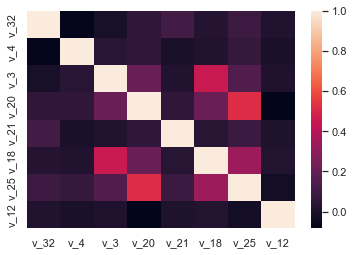

In [ ]:
fig = sns.heatmap(ndc_corr)

#### Binarize the Target Variable

In [ ]:
## fig = sns.heatmap(ndc_tdf.corr())
from sklearn.preprocessing import LabelBinarizer, label_binarize
tt_lb = label_binarize(data['label'].to_numpy(),classes=[0,1,2])
ndc_np = nce.transform(ndc)

In [ ]:
### Calculate the Mutual_info_classif

In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif
c  = mutual_info_classif(ndc_np,tt_lb[:,0], discrete_features=True)
c1  = mutual_info_classif(ndc_np,tt_lb[:,1], discrete_features=True)
c2  = mutual_info_classif(ndc_np,tt_lb[:,2], discrete_features=True)

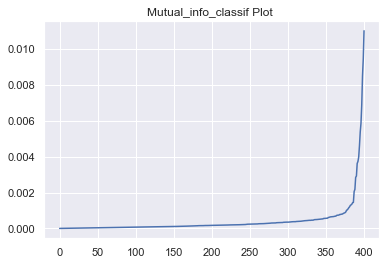

In [47]:
np.printoptions(suppress=True)
# print(s)
info = (c+c1+c2)/3
info.sort()
fig=plt.plot(np.arange(401),info)
# fig=plt.plot(np.arange(94),c1)
# fig=plt.plot(np.arange(94),c2)

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from joblib import parallel_backend
import sklearn.base 

gpc = GaussianProcessClassifier(random_state=42, n_jobs=-1, n_restarts_optimizer=11,warm_start=True,multi_class='one_vs_rest')
lg = LogisticRegression(multi_class='ovr',warm_start=True,n_jobs=-1,max_iter=1000 )
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(warm_start=True,n_jobs=-1,max_features=None,maxBins=2048,random_state=42,)
gbc = GradientBoostingClassifier()
# hgbc = HistGradientBoostingClassifier(max_features)



In [163]:
# X_train, X_test, y_train, y_test = train_test_split(ndc_np,tt_lb, test_size=0.4,random_state=43)
sizes= np.linspace(0.2, 0.9, num=5)
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(ndc_np,data['label'], test_size=size,random_state=43)
    # X_train, X_test, y_train, y_test = train_test_split(ndc_np,data['label'], test_size=0.2,random_state=43)
    with parallel_backend('loky', n_jobs=-1):
        gpc.fit(X_train.todense(),y_train)
        print(gpc.score(X=X_test.todense(),y = y_test))

0.5447368421052632
0.5400280898876404
0.5325670498084292
0.5223392662549946
0.5098039215686274


In [ ]:
kn = gpc.log_marginal_likelihood(clone_kernel=True)


In [ ]:
fi=rfc.feature_importances_
fi.sort()

In [95]:
# with parallel_backend('loky', n_jobs=-1):
#     gpc.fit(X_train.todense(),y_train)
#     print(gpc.score(X=X_test.todense(),y = y_test))

# kn = gpc.log_marginal_likelihood(clone_kernel=True)
# # gpc_ = sklearn.base.clone(gpc)
# # gpc_.kernel = kn 

# # Bring More Data

# X_train, X_test, y_train, y_test = train_test_split(ndc_np,data['label'], test_size=0.7,random_state=43)

# with parallel_backend('loky', n_jobs=-1):
#     gpc.fit(X_train.todense(),y_train)



0.5284820546592032


## Random Projections and Gaussian Projections

In [169]:
# total_nominal_data.shape
# Shape is (5424, 8)
ohe = OneHotEncoder(dtype=np.int8,handle_unknown='infrequent_if_exist')
t_nominal = ohe.fit_transform(total_nominal_data)

# t_nominal.shape
# Shape is (5424,546)

In [166]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim, SparseRandomProjection
g_rand_proj = GaussianRandomProjection(random_state=42)
# johnson_lindenstrauss_min_dim
jl_min_dim = johnson_lindenstrauss_min_dim(5424,eps=0.01)
s_rand_proj = SparseRandomProjection(random_state=42)

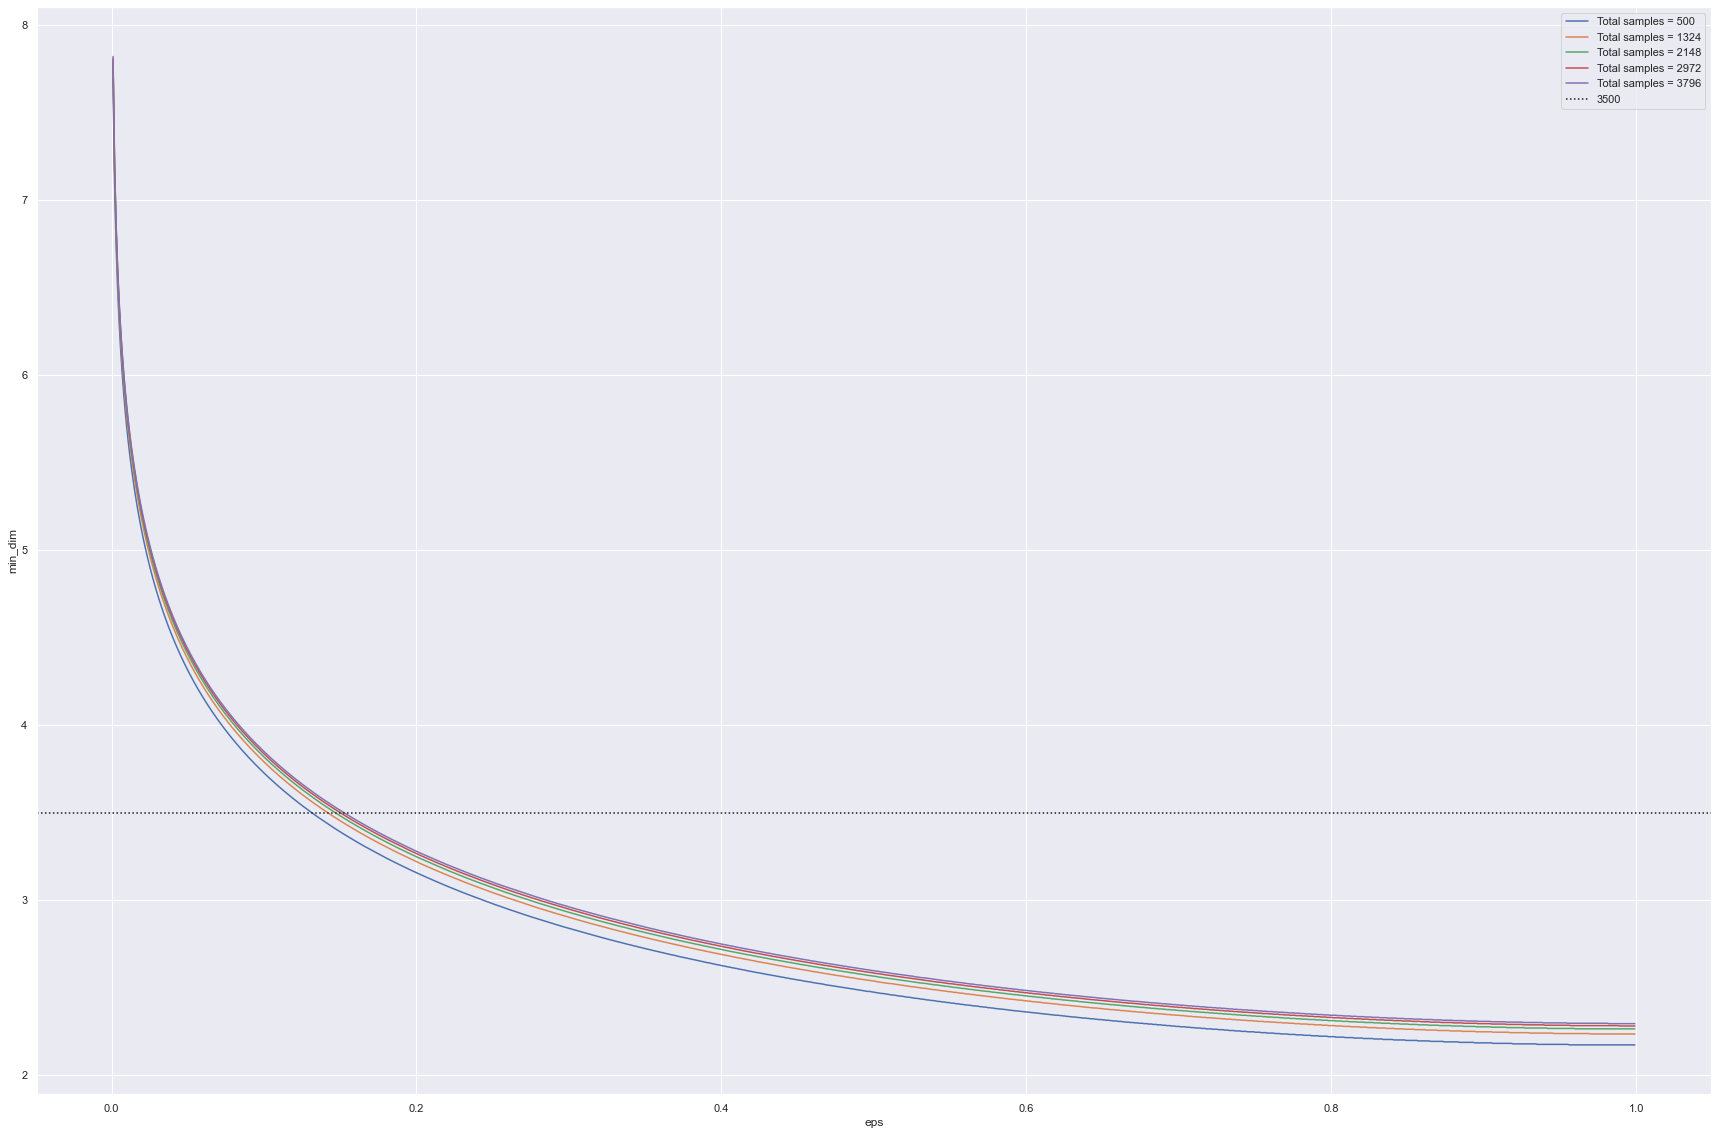

In [198]:
eps = np.arange(0.001, 1, 0.001)
colors = ['b', 'g', 'm', 'c']
m = np.linspace(500,3796, num=5, dtype=np.int32)
plt.figure(figsize=(30,20))

for i in range(5):
    min_dim = johnson_lindenstrauss_min_dim(n_samples=m[i], eps=eps)
    label = 'Total samples = ' + str(m[i])
    fig = plt.plot(eps, np.log10(min_dim), label=label)
plt.xlabel('eps')
plt.ylabel('min_dim')
plt.axhline(y=3.5, color='k', linestyle=':', label='3500')
plt.legend()
plt.show()


## Conclusion Not Applicable for this DataSet !

In [205]:
total_ordinal_data = pd.concat([ordinal_data, ordinal_data_test], axis=0)

In [206]:
total_ordinal_data.shape

(5424, 14)

In [213]:
from collections import OrderedDict
mic_target = mutual_info_classif(ordinal_data, data['label'], n_neighbors=10,)
mic_internal = mutual_info_classif(total_ordinal_data,total_ordinal_data.v_0, n_neighbors=10)
mic = OrderedDict()
with parallel_backend('loky', n_jobs=-1):
    for c in total_ordinal_data.columns:    
        # if c not in ['v_22', 'v_29']:
        mic_internal = mutual_info_classif(total_ordinal_data.astype('int'),total_ordinal_data[c].astype('int'), n_neighbors=10)
        mic[c] = {c: mic_internal_value for c,mic_internal_value in zip(list(total_ordinal_data.columns), list(mic_internal))}
    # mic_internal.sort()

    # mic_internal[-1]

In [233]:
mic_target

array([0.04792575, 0.01291625, 0.17943049, 0.00559544, 0.01930188,
       0.06341332, 0.15633837, 0.00233456, 0.24318397, 0.00435629,
       0.03343081, 0.06481317, 0.18893493, 0.00643331])

In [234]:
f_set = data.drop(['label'], axis=1)
target = data.label
mic_target = mutual_info_classif(f_set, target, n_neighbors=10, random_state=42)
m_info_fvt = dict(zip(f_set, mic_target))

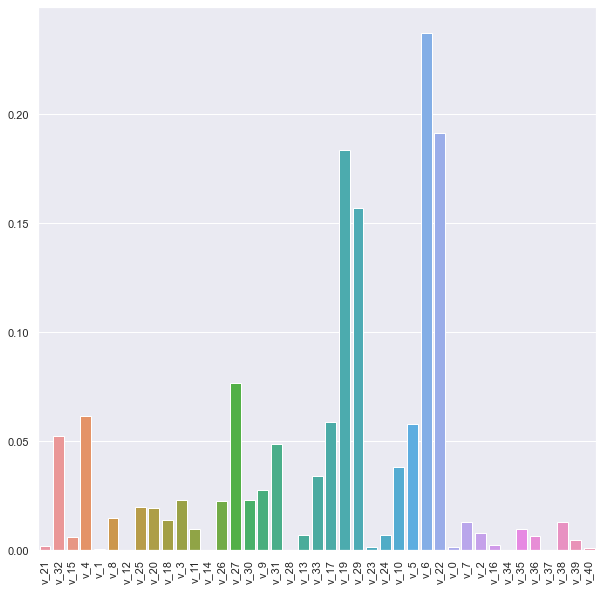

In [246]:
plt.figure(figsize=(10,10))

plt.xticks(rotation=90)
fig = sns.barplot(x=list(f_set.columns), y= list(m_info_fvt.values()), )

In [248]:
mic_df = pd.DataFrame(dict(mic))

In [250]:
mic_df.rank()

,v_31,v_15,v_19,v_13,v_33,v_17,v_29,v_23,v_6,v_24,v_10,v_5,v_22,v_0
v_31,14.0,3.0,3.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
v_15,10.0,14.0,1.0,1.0,2.0,1.0,3.0,6.0,1.0,3.0,2.0,1.0,2.0,6.0
v_19,5.0,5.0,14.0,10.0,12.0,11.0,12.0,5.0,13.0,10.0,11.0,10.0,11.0,4.0
v_13,12.0,6.0,6.0,14.0,7.0,5.0,4.0,11.0,5.0,13.0,7.0,5.0,4.0,9.0
v_33,8.0,7.0,12.0,12.0,14.0,12.0,8.0,7.0,10.0,12.0,13.0,9.0,9.0,8.0
v_17,4.0,1.0,8.0,8.0,10.0,14.0,9.0,3.0,7.0,8.0,9.0,13.0,8.0,2.0
v_29,2.0,10.0,10.0,3.0,6.0,8.0,14.0,10.0,8.0,2.0,5.0,7.0,13.0,7.0
v_23,11.0,12.0,2.0,5.0,4.0,3.0,6.0,14.0,3.0,6.0,4.0,3.0,3.0,13.0
v_6,6.0,4.0,13.0,9.0,11.0,9.0,11.0,4.0,14.0,9.0,12.0,11.0,12.0,5.0
v_24,13.0,8.0,5.0,13.0,8.0,6.0,2.0,12.0,6.0,14.0,8.0,6.0,5.0,12.0
